# EnvBert

EnvBert is an easy-to-use Python library built on top of Bert models to identify essential environmental data as a part of due diligence in environmental site assessments.

Authors:
Afreen Aman https://www.linkedin.com/in/afreen-aman-177824b8/

Deepak John Reji https://www.linkedin.com/in/deepak-john-reji/

## Installation

In [1]:
!pip install --no-deps EnvBert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 1.3 MB/s eta 0:00:00


In [13]:
# load functions from envbert
import EnvBert
from EnvBert.due_diligence import envbert_predict

import tensorflow as tf
import pandas as pd

from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification

In [23]:
EnvBert.due_diligence.env_model.config

DistilBertConfig {
  "_name_or_path": "d4data/environmental-due-diligence-model",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "Remediation Standards",
    "1": "Extent of contamination",
    "2": "Depth to Water",
    "3": "Groundwater-Surfacewater interaction",
    "4": "GW Velocity",
    "5": "Geology",
    "6": "Contaminated media",
    "7": "Remediation Activities",
    "8": "Remediation Goals",
    "9": "Source of contamination",
    "10": "Contaminants"
  },
  "initializer_range": 0.02,
  "label2id": {
    "Contaminants": "10",
    "Contaminated media": "6",
    "Depth to Water": "2",
    "Extent of Contamination": "1",
    "Extent of contamination": "1",
    "GW Velocity": "4",
    "Geology": "5",
    "Groundwater-Surfacewater interaction": "3",
    "Remediation Activities": "7",
    "Remediation Goals": "8",
    "Remediation 

In [25]:
EnvBert.due_diligence.env_model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  8459      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66961931 (255.44 MB)
Trainable params: 66961931 (255.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
EnvBert.due_diligence.env_tokenizer

DistilBertTokenizerFast(name_or_path='d4data/environmental-due-diligence-model', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

## EnvBert for EDD Prediction

In [27]:
# provide a test sentence
doc = "At the every month post-injection monitoring event, TCE, carbon tetrachloride, and chloroform concentrations were above CBSGs in three of the wells"

# run the function over this test sentence
envbert_predict(doc)

['Remediation Standards', 0.3396793975943153]

## EnvBert for determining the relevancy

In [28]:
# provide a sentence which is not related Environment
doc1 = "Tesla designs and manufactures electric vehicles, battery energy storage from home to grid-scale, solar panels and solar roof tiles, and related products and services."

# run the function over this irrelevant sentence
envbert_predict(doc1)

['Not Relevant', 0.1487391440698568]

In [29]:
# provide a sentence which is about environment domain
doc2 = "weathered shale was encountered below the surface area with fluvial deposits. Sediments in the coastal plain region are found above and below the bedrock with sandstones and shales that form the basement rock"

# run the function over this irrelevant sentence
envbert_predict(doc2)

['Geology', 0.6775882810849261]

## EnvBert for ranking the data

In [30]:
# provide a set of sentences
doc_list = ["Norilsk Nickel says ‘flagrant violation of rules’ has been committed by dumping wastewater from reservoir into wildlife.",
"Also, some of the people most harmed by groundwater contamination are indigenous or people of color who live in under-resourced areas, she says. Smaller or disadvantaged communities “should be at the front of the line to make sure they get the money that they need,” Evelyn adds. “Unfortunately, this is not the way that it works. So it’s a scramble.”",
"California fined Chevron more than $2.7 million for numerous violations, noting that the spills caused “significant threat of harm to human health and the environment.” ​",
"Last fall, the Central Valley Regional Water Quality Control Board assured critics that it had reviewed studies of the practice and found no elevated risks to human health or crop safety. The board focused primarily on one question—are crops grown with produced water safe to eat?—and considered as beyond the scope of its responsibility the wider range of potential harms associated with recycling the oil industry’s wastewater.",
"But scientists in other parts of the country have investigated these questions, looking at both the consequences of intentional reuse of oil wastewater for irrigation and disposal and accidental spills of the wastewater on wildlife and the environment. And a growing body of research shows that even highly diluted produced water can harm soil, plants, and aquatic life, and that oil drilling boosts groundwater concentrations of naturally occurring toxic elements like arsenic, and radioactive elements like radium, while also endangering sensitive ecosystems and protected wildlife."]

for i in doc_list:
    print(f'doc: ', i)
    for j in [envbert_predict(i)]:
        print(f'prediction:',j[0])
        print(f'probability:', j[1])
    print("")

doc:  Norilsk Nickel says ‘flagrant violation of rules’ has been committed by dumping wastewater from reservoir into wildlife.
prediction: Contaminated media
probability: 0.36697776940266513

doc:  Also, some of the people most harmed by groundwater contamination are indigenous or people of color who live in under-resourced areas, she says. Smaller or disadvantaged communities “should be at the front of the line to make sure they get the money that they need,” Evelyn adds. “Unfortunately, this is not the way that it works. So it’s a scramble.”
prediction: Contaminated media
probability: 0.3219965905887965

doc:  California fined Chevron more than $2.7 million for numerous violations, noting that the spills caused “significant threat of harm to human health and the environment.” ​
prediction: Contaminated media
probability: 0.3608906429333577

doc:  Last fall, the Central Valley Regional Water Quality Control Board assured critics that it had reviewed studies of the practice and found n

## EnvBert for Fine-tuning new data

In [114]:
import pandas as pd
df = pd.read_excel('wildfire data - Train.xlsx')

In [115]:
df

,Sentence,label
0,Wildfires release massive amounts of particula...,Air Quality and Atmospheric Impacts
1,The combustion of vegetation during wildfires ...,Air Quality and Atmospheric Impacts
2,Prolonged exposure to wildfire smoke has been ...,Air Quality and Atmospheric Impacts
3,The release of volatile organic compounds duri...,Air Quality and Atmospheric Impacts
4,Forest fires can generate thermal plumes that ...,Air Quality and Atmospheric Impacts
...,...,...
203,Renewable energy sources now account for 30% o...,Not Relevant Environment Data
204,The global music streaming market continues to...,Not Relevant Environment Data
205,Research on the longevity of tortoises has unc...,Not Relevant Environment Data
206,The popularity of virtual fitness apps surged ...,Not Relevant Environment Data


In [116]:
df['label'].unique()

array(['Air Quality and Atmospheric Impacts',
       'Soil, Water, and Ecosystem Impacts',
       'Post-Wildfire Recovery and Landscape Dynamics',
       'Not Relevant Environment Data'], dtype=object)

In [117]:
df['encoded Label'] = df['label']

df.replace({'encoded Label': {'Air Quality and Atmospheric Impacts':0,
 'Soil, Water, and Ecosystem Impacts':1,
 'Post-Wildfire Recovery and Landscape Dynamics':2,
 'Not Relevant Environment Data':3,
  }}, inplace=True)

<ipython-input-117-080b748cf384>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'encoded Label': {'Air Quality and Atmospheric Impacts':0,


In [118]:
df

,Sentence,label,encoded Label
0,Wildfires release massive amounts of particula...,Air Quality and Atmospheric Impacts,0
1,The combustion of vegetation during wildfires ...,Air Quality and Atmospheric Impacts,0
2,Prolonged exposure to wildfire smoke has been ...,Air Quality and Atmospheric Impacts,0
3,The release of volatile organic compounds duri...,Air Quality and Atmospheric Impacts,0
4,Forest fires can generate thermal plumes that ...,Air Quality and Atmospheric Impacts,0
...,...,...,...
203,Renewable energy sources now account for 30% o...,Not Relevant Environment Data,3
204,The global music streaming market continues to...,Not Relevant Environment Data,3
205,Research on the longevity of tortoises has unc...,Not Relevant Environment Data,3
206,The popularity of virtual fitness apps surged ...,Not Relevant Environment Data,3


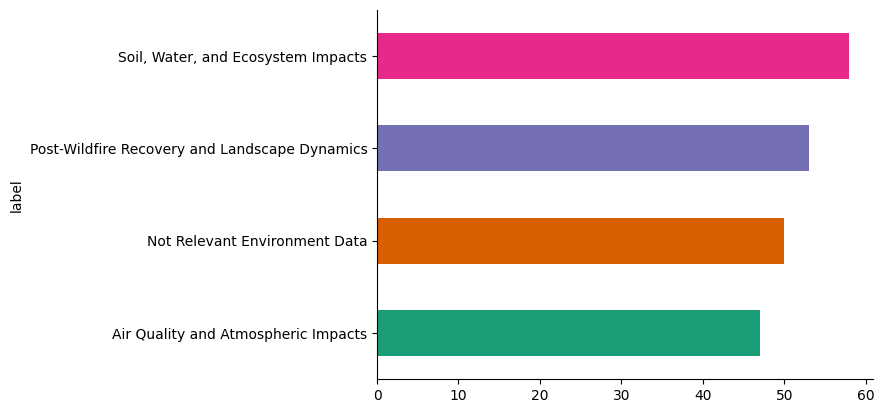

In [119]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [120]:
import os
os.getcwd()

'/content'

In [121]:
df.columns

Index(['Sentence', 'label', 'encoded Label'], dtype='object')

In [152]:
# define training config
training_config = {
    'learning_rate':5e-5,
    'epochs':3,
    'batch_size':16,
    'sentence column name':'Sentence', #training sentences column name
    'label column name': 'encoded Label', #encoded labels column name
    'save_dir': r'/content' #model save path
    }

"""
please make sure you encode your labels
provide the save_dir path to automatically save the model after training
'sentence column name' and 'label column name' are mandatory fields in training config
you can tweak the other parameters or it will be taken by default
"""

"\nplease make sure you encode your labels\nprovide the save_dir path to automatically save the model after training\n'sentence column name' and 'label column name' are mandatory fields in training config\nyou can tweak the other parameters or it will be taken by default\n"

In [162]:
def finetune(data, training_config):
    try:
        #unwrapping training configurations
        if 'learning_rate' in training_config.keys():
            l_r = training_config['learning_rate']
        else:
            l_r = 5e-5

        if 'epochs' in training_config.keys():
            epoch_count = training_config['epochs']
        else:
            epoch_count = 10

        if 'batch_size' in training_config.keys():
            batch_size = training_config['batch_size']
        else:
            batch_size = 16

        if 'sentence column name' in training_config.keys():
            sentence = training_config['sentence column name']

        if 'label column name' in training_config.keys():
            encoded_label = training_config['label column name']

        if sentence and encoded_label:
            data.dropna(subset=[sentence, encoded_label], how='any', inplace=True)
            # features and labels
            data_texts = data[sentence].to_list() # Features (not-tokenized yet)
            data_labels = data[encoded_label].to_list() # Lables

            # tokenizing the text
            train_encodings = env_tokenizer(data_texts, truncation=True, padding=True)

            train_dataset = tf.data.Dataset.from_tensor_slices((
                dict(train_encodings),
                data_labels
            ))

            optimizer = tf.keras.optimizers.Adam(learning_rate=l_r)
            env_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

            env_model.fit(train_dataset.shuffle(1000).batch(batch_size), epochs=epoch_count, batch_size=batch_size,
                          validation_data=train_dataset.shuffle(1000).batch(batch_size))
            print("Model trained successfully!!!")

            try:
                if 'save_dir' in training_config.keys():
                    env_model.save_pretrained(training_config['save_dir'])
                    env_tokenizer.save_pretrained(training_config['save_dir'])
                    print("Model saved successfully")
            except:
                print("Model save unsuccessfull, please save it yourself from the returned models")

            return env_model, env_tokenizer
        else:
            print("There is an error, Model cannot be trained")
            return None, None
    except:
        return None, None
        print("There is an error, Model cannot be trained")


In [163]:
# Train the model with just 1 line
new_model, new_tokenizer = finetune(df, training_config)

Epoch 1/3
13/13 [==============================] - 102s 7s/step - loss: 8.6036 - accuracy: 0.2260 - val_loss: 8.4208 - val_accuracy: 0.2260
Epoch 2/3
13/13 [==============================] - 67s 5s/step - loss: 8.7561 - accuracy: 0.2260 - val_loss: 8.3803 - val_accuracy: 0.2260
Epoch 3/3
13/13 [==============================] - 70s 5s/step - loss: 8.5572 - accuracy: 0.2260 - val_loss: 8.5335 - val_accuracy: 0.2260
Model trained successfully!!!
Model saved successfully


In [172]:
test_text = "Forest restoration projects include planting fire-resistant tree species.."

print("Sentence : " + test_text)
print("\n")
predict_input = new_tokenizer.encode(test_text,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

output = new_model(predict_input)[0]

prediction_value = tf.argmax(output, axis=1).numpy()[0]

if (prediction_value == 0):
    print("Air Quality and Atmospheric Impacts")
elif (prediction_value == 1):
    print("Soil, Water, and Ecosystem Impacts")
elif (prediction_value == 2):
    print("Post-Wildfire Recovery and Landscape Dynamics")
else:
    print("Not Relevant Environment Data")

Sentence : Forest restoration projects include planting fire-resistant tree species..


Air Quality and Atmospheric Impacts


In [154]:
l_r = training_config['learning_rate']
epoch_count = training_config['epochs']
batch_size = training_config['batch_size']
sentence = training_config['sentence column name']
encoded_label = training_config['label column name']


In [155]:
#Classification Model
env_tokenizer = AutoTokenizer.from_pretrained("d4data/environmental-due-diligence-model")
env_model = TFAutoModelForSequenceClassification.from_pretrained("d4data/environmental-due-diligence-model")


Some layers from the model checkpoint at d4data/environmental-due-diligence-model were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at d4data/environmental-due-diligence-model and are newly initialized: ['dropout_199']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [156]:
data_texts = df[sentence].to_list() # Features (not-tokenized yet)
data_labels = df[encoded_label].to_list() # Lables

In [157]:
# tokenizing the text
train_encodings = env_tokenizer(data_texts, truncation=True, padding=True)

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    data_labels
))

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [158]:
optimizer = tf.keras.optimizers.Adam(learning_rate=l_r)
env_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])


In [159]:
env_model.summary()

Model: "tf_distil_bert_for_sequence_classification_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  8459      
                                                                 
 dropout_199 (Dropout)       multiple                  0 (unused)
                                                                 
Total params: 66961931 (255.44 MB)
Trainable params: 66961931 (255.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
env_model.fit(train_dataset.shuffle(1000).batch(batch_size), epochs=epoch_count, batch_size=batch_size,
                          validation_data=train_dataset.shuffle(1000).batch(batch_size))


Epoch 1/3
13/13 [==============================] - 89s 6s/step - loss: 10.6400 - accuracy: 0.2596 - val_loss: 8.6459 - val_accuracy: 0.3510
Epoch 2/3
13/13 [==============================] - 61s 5s/step - loss: 8.7900 - accuracy: 0.2452 - val_loss: 9.2450 - val_accuracy: 0.2260
Epoch 3/3
13/13 [==============================] - 60s 5s/step - loss: 8.6027 - accuracy: 0.2260 - val_loss: 8.5446 - val_accuracy: 0.2260


In [161]:
env_model.predict()

13/13 [==============================] - 19s 1s/step


TFSequenceClassifierOutput(loss=None, logits=array([[ 6.7635517 ,  0.19394515, -2.6094708 , ..., -0.8855013 ,
        -3.934679  , -1.4036539 ],
       [ 6.1891794 ,  0.68179667, -2.8017876 , ..., -1.176125  ,
        -4.260385  , -2.1229799 ],
       [ 6.1907344 ,  1.5248986 , -2.4372523 , ..., -1.4513704 ,
        -3.9570572 , -1.4563284 ],
       ...,
       [ 5.8274884 ,  2.0504756 , -2.3258839 , ..., -1.4698235 ,
        -4.0151772 , -1.6554987 ],
       [ 5.060868  ,  3.2181828 , -2.360615  , ..., -1.6946164 ,
        -3.9171221 , -1.717904  ],
       [ 5.0906262 ,  3.357386  , -2.45493   , ..., -1.6962099 ,
        -3.9456372 , -1.441622  ]], dtype=float32), hidden_states=None, attentions=None)

In [ ]:
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer) # cuda = 0,1 based on gpu availability
classifier("At the every month post-injection monitoring event, TCE, carbon tetrachloride, and chloroform concentrations were above CBSGs in three of the wells")

In [139]:
for sample in train_dataset.take(1):
    print(sample)

({'input_ids': <tf.Tensor: shape=(31,), dtype=int32, numpy=
array([  101,  3748, 26332,  2713,  5294,  8310,  1997,  2112, 24153,
        3043,  2046,  1996,  7224,  1010,  8161,  2250,  3737,  2005,
        3134,  1012,   102,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(31,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>}, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


In [142]:
sample_features, sample_labels = next(iter(train_dataset.batch(batch_size)))
predictions = env_model(sample_features)
print(predictions)

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(16, 11), dtype=float32, numpy=
array([[-3.2095609 ,  1.2989036 , -3.206203  , -2.9736164 , -3.020591  ,
        -3.421527  ,  4.775108  , -2.7742426 , -2.4060464 ,  1.4287701 ,
        -1.6242486 ],
       [-3.7803345 ,  0.5686632 , -3.8761795 , -3.407416  , -3.3467786 ,
        -3.6241734 ,  2.7095737 , -1.7513851 , -2.6850553 ,  4.3819513 ,
        -0.38452685],
       [-2.4980395 ,  0.5821175 , -3.385915  , -3.004921  , -3.254894  ,
        -3.3025465 ,  6.219298  , -2.8600972 , -1.3499898 , -0.9717149 ,
        -0.5941346 ],
       [-3.8256092 ,  0.9021011 , -3.5321295 , -3.156654  , -3.7002444 ,
        -1.6315839 ,  3.8362374 , -3.0619428 , -3.0098271 ,  2.4816232 ,
        -0.6889618 ],
       [-3.3774    ,  5.65824   , -2.9848926 , -2.8306887 , -2.600963  ,
        -2.7099304 , -0.35057425, -3.1680439 , -3.2832224 ,  1.0580403 ,
        -0.33328936],
       [-3.1861033 ,  3.2990346 , -3.025333  , -2.7054625 , -2.99

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
